In [ ]:
# φόρτωση βιβλιοθηκών
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [ ]:
# έλεγχος κατανομής κλάσεων
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [ ]:
# φόρτωση συνόλου δεδομένων
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
data = pd.read_csv(url)

In [ ]:
# διαγραφή κενών ή μη αριθμητικών τιμών
data = data.select_dtypes(include=['float64', 'int64']).dropna()

In [ ]:
# διαχωρισμός ανεξάρτητων και εξαρτημένων μεταβλητών
X = data.drop('Class', axis=1)
y = data['Class']

In [12]:
# διαχωρισμός συνόλου δεδομένων σε σύνολο εκπαίδευσης και δοκιμών
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=43)

C:\Users\petro\AppData\Local\Temp\ipykernel_9984\93420845.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


Text(0, 0.5, 'Frequency')

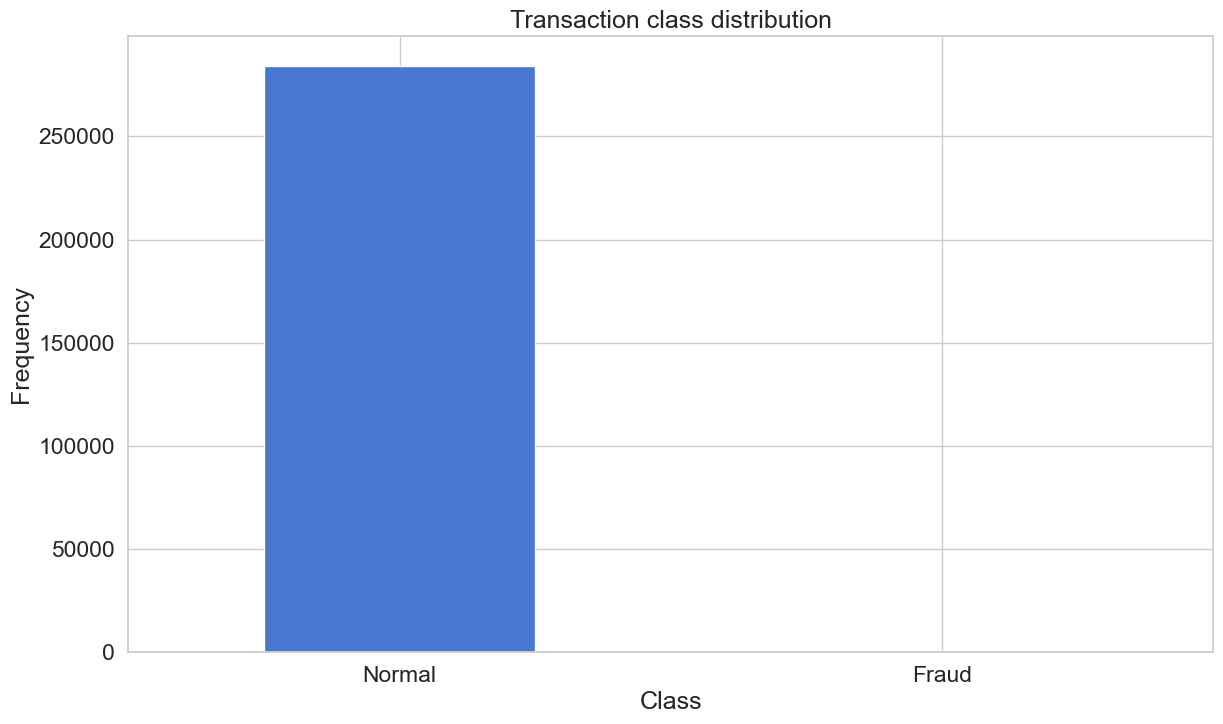

In [13]:
# κατανομή της εξαρτημένης μεταβλητής (class)
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")


In [14]:
# δημιουργία Random Forest αλγορίθμου
model = RandomForestClassifier()

In [15]:
# εκπαίδευση αλγόριθμου
model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
# πρόβλεψη συνόλου δοκιμής
y_pred = model.predict(X_test)

In [20]:
# υπολογισμός μετρικών αξιολόγησης (accuracy, precision, recall, f-score, confusion matrix)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display results
print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9994967405170698
Precision: 0.9994786046565134
Recall: 0.9994967405170698
F1 Score: 0.9994677880135643
Confusion Matrix:
[[85287     6]
 [   37   113]]
